## Change this from a multi-class problem into a binary class problem

**Currently**  
0 - No use  
1 - short term  
2 - long term  

**Change to**  
0 - no use/ short term use  
1 - long term use  

In [2]:
import shap
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import matplotlib.pyplot as plt
%matplotlib inline

from pre_process import num_of_vars, change_vars, make_binary
from compare_models import train_val_test, logistic_report, knn_report, rfc_report, gb_report, compare

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
non_preg = pd.read_pickle('second_model_df.pkl')
non_preg.head(3)

,caseid,Age,Num_children_born,Num_living_children,age_at_first_marriage,age_at_first_intercourse,freq_of_intercourse,Religion_dup,children_in_residence,Knowledge_of_ovulatory_cycle_dup,Knows_method_source_dup,currently_abstaining_dup,desire_for_more_kids_dup,Woman_worked_after_marriage_dup,Woman_currently_working_dup,heard_FP_message_in_last_month_dup,Has_transportation,media_exposure_level,Education_level_dup,Literacy_dup,Husbands_edu_level_dup,Husbands_literacy_dup,Knowledge_of_methods_dup,Used_any_method_dup,Current_method_dup
0,11 1 1 2,41,6,5,15,15.0,4.0,1,0,1,1,0,0,1,1,1,1,1,2,2,1,2,1,2,0
1,11 1 4 4,27,5,5,18,18.0,4.0,1,1,1,1,1,0,0,0,1,1,3,2,2,2,2,1,0,0
2,11 1 8 2,41,9,9,18,18.0,3.0,1,1,1,1,0,0,1,1,1,1,1,1,2,2,2,1,0,0


In [5]:
make_binary(non_preg, 'Current_method_dup', '2', 1 )
non_preg.head(3)

,caseid,Age,Num_children_born,Num_living_children,age_at_first_marriage,age_at_first_intercourse,freq_of_intercourse,Religion_dup,children_in_residence,Knowledge_of_ovulatory_cycle_dup,Knows_method_source_dup,currently_abstaining_dup,desire_for_more_kids_dup,Woman_worked_after_marriage_dup,Woman_currently_working_dup,heard_FP_message_in_last_month_dup,Has_transportation,media_exposure_level,Education_level_dup,Literacy_dup,Husbands_edu_level_dup,Husbands_literacy_dup,Knowledge_of_methods_dup,Used_any_method_dup,Current_method_dup,Current_method_dup_dup
0,11 1 1 2,41,6,5,15,15.0,4.0,1,0,1,1,0,0,1,1,1,1,1,2,2,1,2,1,2,0,0
1,11 1 4 4,27,5,5,18,18.0,4.0,1,1,1,1,1,0,0,0,1,1,3,2,2,2,2,1,0,0,0
2,11 1 8 2,41,9,9,18,18.0,3.0,1,1,1,1,0,0,1,1,1,1,1,1,2,2,2,1,0,0,0


In [6]:
num_of_vars(non_preg, 'Current_method_dup_dup')

Num of Current_method_dup_dup variables: 2
1    3937
0    3343
Name: Current_method_dup_dup, dtype: int64 



In [7]:
#clean up the df a bit
non_preg.drop(columns = 'Current_method_dup', inplace = True)
non_preg.rename(columns = {'Current_method_dup_dup': 'Current_Method'}, inplace = True)
non_preg.head(3)

,caseid,Age,Num_children_born,Num_living_children,age_at_first_marriage,age_at_first_intercourse,freq_of_intercourse,Religion_dup,children_in_residence,Knowledge_of_ovulatory_cycle_dup,Knows_method_source_dup,currently_abstaining_dup,desire_for_more_kids_dup,Woman_worked_after_marriage_dup,Woman_currently_working_dup,heard_FP_message_in_last_month_dup,Has_transportation,media_exposure_level,Education_level_dup,Literacy_dup,Husbands_edu_level_dup,Husbands_literacy_dup,Knowledge_of_methods_dup,Used_any_method_dup,Current_Method
0,11 1 1 2,41,6,5,15,15.0,4.0,1,0,1,1,0,0,1,1,1,1,1,2,2,1,2,1,2,0
1,11 1 4 4,27,5,5,18,18.0,4.0,1,1,1,1,1,0,0,0,1,1,3,2,2,2,2,1,0,0
2,11 1 8 2,41,9,9,18,18.0,3.0,1,1,1,1,0,0,1,1,1,1,1,1,2,2,2,1,0,0


In [8]:
non_preg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7280 entries, 0 to 7279
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   caseid                              7280 non-null   object  
 1   Age                                 7280 non-null   int8    
 2   Num_children_born                   7280 non-null   int8    
 3   Num_living_children                 7280 non-null   int8    
 4   age_at_first_marriage               7280 non-null   int8    
 5   age_at_first_intercourse            7280 non-null   category
 6   freq_of_intercourse                 7280 non-null   category
 7   Religion_dup                        7280 non-null   object  
 8   children_in_residence               7280 non-null   object  
 9   Knowledge_of_ovulatory_cycle_dup    7280 non-null   object  
 10  Knows_method_source_dup             7280 non-null   object  
 11  currently_abstaining_dup      

In [9]:
#need to make these at least floats
non_preg = non_preg.iloc[:, 1:].astype(float)

In [10]:
non_preg.to_pickle('binary_non_preg_full.pkl')

# Compare the different models for the binary classification case

In [11]:
#define the features and target
features1 = ['Age', 'Num_children_born',
              'Num_living_children', 'age_at_first_marriage',
              'age_at_first_intercourse', 
              'freq_of_intercourse',
              'Religion_dup', 'children_in_residence',
              'Knowledge_of_ovulatory_cycle_dup', 
              'Knows_method_source_dup', 
              'currently_abstaining_dup', 
              'desire_for_more_kids_dup', 
              'Woman_worked_after_marriage_dup', 
              'Woman_currently_working_dup', 
              'heard_FP_message_in_last_month_dup', 
              'Has_transportation', 
              'media_exposure_level', 'Education_level_dup', 
              'Literacy_dup', 'Husbands_edu_level_dup', 
              'Husbands_literacy_dup',
              'Knowledge_of_methods_dup', 'Used_any_method_dup']

target1 = 'Current_Method'

In [12]:
X_train1, y_train1, X_val1, y_val1, X_test1, y_test1 = train_val_test(non_preg, features1, target1)


## Logistic Regression1

Logistic Regression Train score: 0.8596265292981327
Logistic Regression Validate score: 0.8583690987124464
Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.95      0.73      0.82       527
           1       0.81      0.97      0.88       638

    accuracy                           0.86      1165
   macro avg       0.88      0.85      0.85      1165
weighted avg       0.87      0.86      0.86      1165

Logistic Regression Confusion Matrix


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


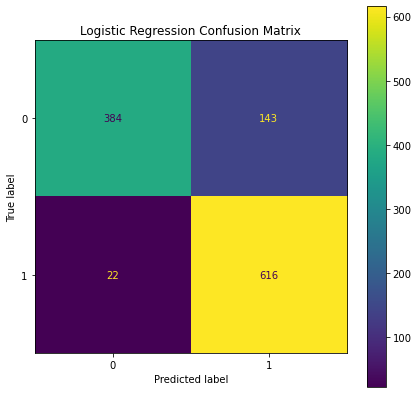

In [13]:
logistic_report(X_train1, y_train1, X_val1, y_val1)

## KNN1

knn Training Score: 0.8446018458896759
knn Test Score: 0.8085836909871245
knn Classification Report
              precision    recall  f1-score   support

           0       0.87      0.67      0.76       527
           1       0.77      0.92      0.84       638

    accuracy                           0.81      1165
   macro avg       0.82      0.80      0.80      1165
weighted avg       0.82      0.81      0.80      1165

knn Confusion Matrix


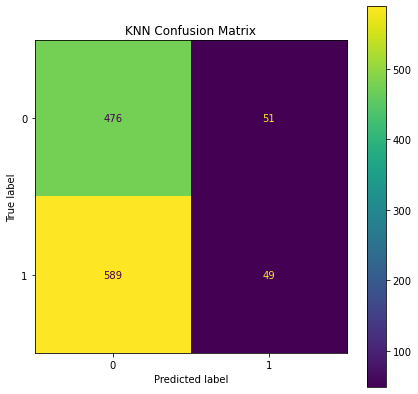

In [14]:
knn_report(X_train1, y_train1, X_val1, y_val1)

In [15]:
non_preg['Current_Method'].value_counts()

1.0    3937
0.0    3343
Name: Current_Method, dtype: int64

## RandomForestClassifier1

RandomForestClassifier Classification Report
              precision    recall  f1-score   support

           0       0.92      0.74      0.82       527
           1       0.81      0.95      0.87       638

    accuracy                           0.85      1165
   macro avg       0.87      0.84      0.85      1165
weighted avg       0.86      0.85      0.85      1165

RandomForestClassifier Confusion Matrix
RandomForestClassifier feature importance
Feature: 0, Score: 0.08599
Feature: 1, Score: 0.05801
Feature: 2, Score: 0.05526
Feature: 3, Score: 0.04856
Feature: 4, Score: 0.04735
Feature: 5, Score: 0.04791
Feature: 6, Score: 0.00959
Feature: 7, Score: 0.01288
Feature: 8, Score: 0.01387
Feature: 9, Score: 0.00776
Feature: 10, Score: 0.02453
Feature: 11, Score: 0.03288
Feature: 12, Score: 0.01082
Feature: 13, Score: 0.01027
Feature: 14, Score: 0.01422
Feature: 15, Score: 0.01505
Feature: 16, Score: 0.02927
Feature: 17, Score: 0.01432
Feature: 18, Score: 0.01083
Feature: 19, Score: 0.02

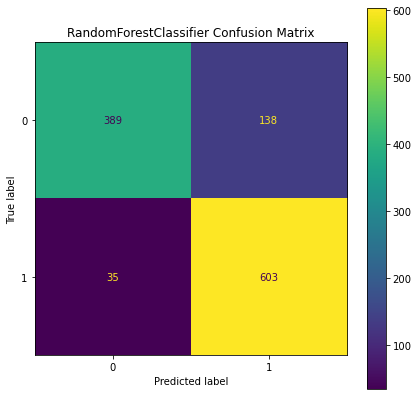

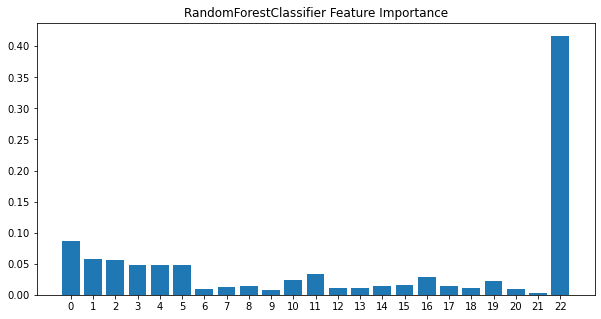

In [16]:
rfc_report(X_train1, y_train1, X_val1, y_val1)

## GradientBoostingClassifier1

GradientBoodtingClassifier Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       527
           1       1.00      1.00      1.00       638

    accuracy                           1.00      1165
   macro avg       1.00      1.00      1.00      1165
weighted avg       1.00      1.00      1.00      1165

GradientBoodtingClassifier Confusion Matrix
GradientBoodtingClassifier feature importance
Feature: 0, Score: 0.04433
Feature: 1, Score: 0.02453
Feature: 2, Score: 0.01607
Feature: 3, Score: 0.01232
Feature: 4, Score: 0.01218
Feature: 5, Score: 0.02048
Feature: 6, Score: 0.00382
Feature: 7, Score: 0.00493
Feature: 8, Score: 0.00395
Feature: 9, Score: 0.00070
Feature: 10, Score: 0.03082
Feature: 11, Score: 0.03002
Feature: 12, Score: 0.00228
Feature: 13, Score: 0.00268
Feature: 14, Score: 0.00543
Feature: 15, Score: 0.00305
Feature: 16, Score: 0.00906
Feature: 17, Score: 0.00426
Feature: 18, Score: 0.00268
Feature: 19,

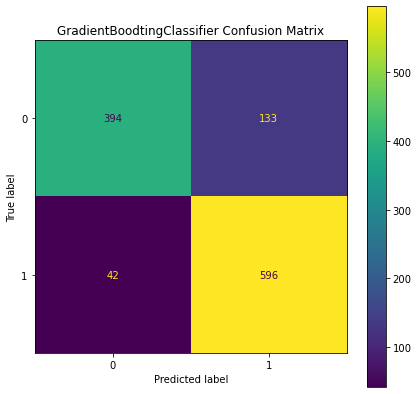

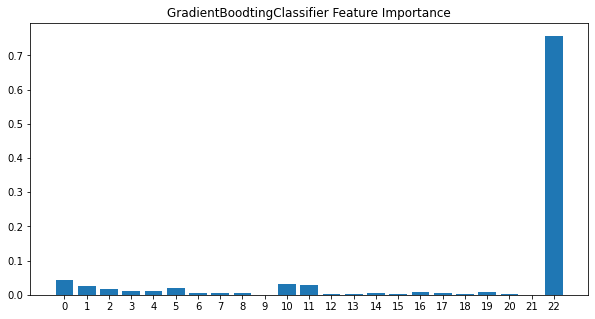

In [17]:
gb_report(X_train1, y_train1, X_val1, y_val1)

In [18]:
non_preg.head(1)

,Age,Num_children_born,Num_living_children,age_at_first_marriage,age_at_first_intercourse,freq_of_intercourse,Religion_dup,children_in_residence,Knowledge_of_ovulatory_cycle_dup,Knows_method_source_dup,currently_abstaining_dup,desire_for_more_kids_dup,Woman_worked_after_marriage_dup,Woman_currently_working_dup,heard_FP_message_in_last_month_dup,Has_transportation,media_exposure_level,Education_level_dup,Literacy_dup,Husbands_edu_level_dup,Husbands_literacy_dup,Knowledge_of_methods_dup,Used_any_method_dup,Current_Method
0,41.0,6.0,5.0,15.0,15.0,4.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,0.0


# Compare the models without considering the previous methods they've used column

That's something we might not have access to for the general population, and could potentially be contributing to data leakage

In [19]:
no_prev_mtd = non_preg.drop(columns = 'Used_any_method_dup')
no_prev_mtd.head(3)

,Age,Num_children_born,Num_living_children,age_at_first_marriage,age_at_first_intercourse,freq_of_intercourse,Religion_dup,children_in_residence,Knowledge_of_ovulatory_cycle_dup,Knows_method_source_dup,currently_abstaining_dup,desire_for_more_kids_dup,Woman_worked_after_marriage_dup,Woman_currently_working_dup,heard_FP_message_in_last_month_dup,Has_transportation,media_exposure_level,Education_level_dup,Literacy_dup,Husbands_edu_level_dup,Husbands_literacy_dup,Knowledge_of_methods_dup,Current_Method
0,41.0,6.0,5.0,15.0,15.0,4.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,0.0
1,27.0,5.0,5.0,18.0,18.0,4.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,2.0,2.0,2.0,2.0,1.0,0.0
2,41.0,9.0,9.0,18.0,18.0,3.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,0.0


In [20]:
#define the features and target
features2 = ['Age', 'Num_children_born',
              'Num_living_children', 'age_at_first_marriage',
              'age_at_first_intercourse', 
              'freq_of_intercourse',
              'Religion_dup', 'children_in_residence',
              'Knowledge_of_ovulatory_cycle_dup', 
              'Knows_method_source_dup', 
              'currently_abstaining_dup', 
              'desire_for_more_kids_dup', 
              'Woman_worked_after_marriage_dup', 
              'Woman_currently_working_dup', 
              'heard_FP_message_in_last_month_dup', 
              'Has_transportation', 
              'media_exposure_level', 'Education_level_dup', 
              'Literacy_dup', 'Husbands_edu_level_dup', 
              'Husbands_literacy_dup',
              'Knowledge_of_methods_dup']

target2 = 'Current_Method'

In [21]:
X_train2, y_train2, X_val2, y_val2, X_test2, y_test2 = train_val_test(no_prev_mtd, features2, target2)


## Logistic Regression2

Logistic Regression Train score: 0.6932818201330758
Logistic Regression Validate score: 0.6643776824034334
Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.71      0.44      0.54       527
           1       0.65      0.85      0.73       638

    accuracy                           0.66      1165
   macro avg       0.68      0.65      0.64      1165
weighted avg       0.67      0.66      0.65      1165

Logistic Regression Confusion Matrix


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


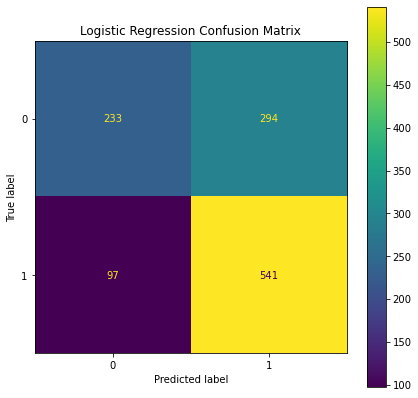

In [22]:
logistic_report(X_train2, y_train2, X_val2, y_val2)

## KNN2

knn Training Score: 0.7364241253487873
knn Test Score: 0.648068669527897
knn Classification Report
              precision    recall  f1-score   support

           0       0.65      0.49      0.56       527
           1       0.65      0.78      0.71       638

    accuracy                           0.65      1165
   macro avg       0.65      0.63      0.63      1165
weighted avg       0.65      0.65      0.64      1165

knn Confusion Matrix


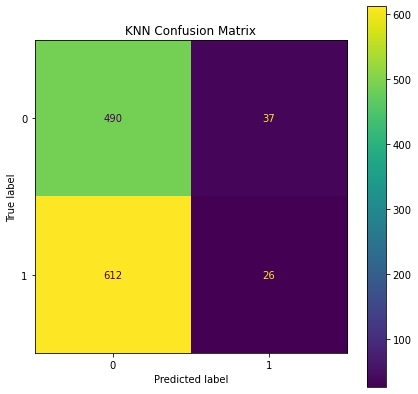

In [23]:
knn_report(X_train2, y_train2, X_val2, y_val2)

## RandomForestClassifier2

RandomForestClassifier Classification Report
              precision    recall  f1-score   support

           0       0.69      0.56      0.62       527
           1       0.69      0.79      0.74       638

    accuracy                           0.69      1165
   macro avg       0.69      0.68      0.68      1165
weighted avg       0.69      0.69      0.68      1165

RandomForestClassifier Confusion Matrix
RandomForestClassifier feature importance
Feature: 0, Score: 0.15633
Feature: 1, Score: 0.09083
Feature: 2, Score: 0.09103
Feature: 3, Score: 0.08874
Feature: 4, Score: 0.08705
Feature: 5, Score: 0.08768
Feature: 6, Score: 0.01654
Feature: 7, Score: 0.02108
Feature: 8, Score: 0.02472
Feature: 9, Score: 0.01647
Feature: 10, Score: 0.03198
Feature: 11, Score: 0.04474
Feature: 12, Score: 0.01716
Feature: 13, Score: 0.01615
Feature: 14, Score: 0.02290
Feature: 15, Score: 0.02756
Feature: 16, Score: 0.05272
Feature: 17, Score: 0.02590
Feature: 18, Score: 0.01897
Feature: 19, Score: 0.03

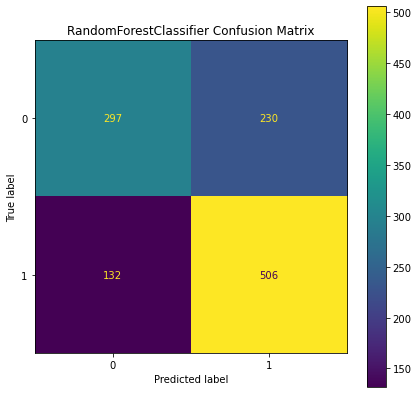

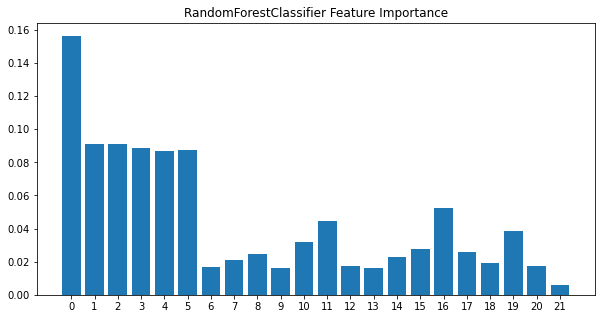

In [24]:
rfc_report(X_train2, y_train2, X_val2, y_val2)

## GradientBoostingClassifier2

GradientBoodtingClassifier Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       527
           1       1.00      1.00      1.00       638

    accuracy                           1.00      1165
   macro avg       1.00      1.00      1.00      1165
weighted avg       1.00      1.00      1.00      1165

GradientBoodtingClassifier Confusion Matrix
GradientBoodtingClassifier feature importance
Feature: 0, Score: 0.18000
Feature: 1, Score: 0.06747
Feature: 2, Score: 0.17393
Feature: 3, Score: 0.04891
Feature: 4, Score: 0.04893
Feature: 5, Score: 0.05909
Feature: 6, Score: 0.01969
Feature: 7, Score: 0.01009
Feature: 8, Score: 0.01372
Feature: 9, Score: 0.04927
Feature: 10, Score: 0.07997
Feature: 11, Score: 0.10305
Feature: 12, Score: 0.01216
Feature: 13, Score: 0.01211
Feature: 14, Score: 0.02460
Feature: 15, Score: 0.00984
Feature: 16, Score: 0.03320
Feature: 17, Score: 0.01263
Feature: 18, Score: 0.01309
Feature: 19,

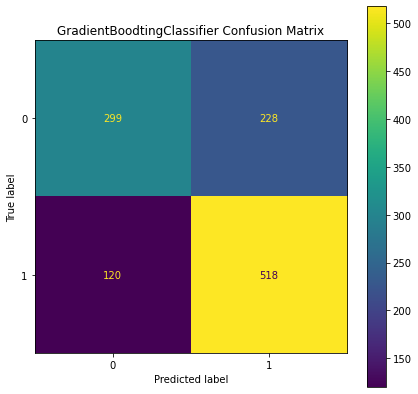

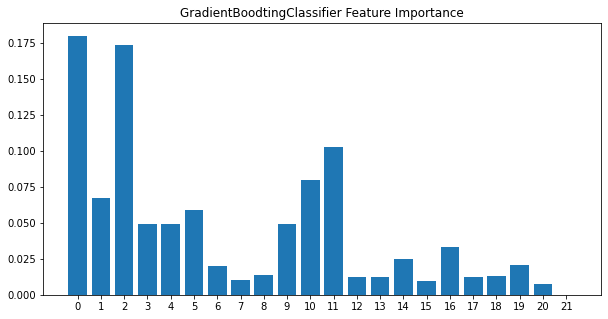

In [25]:
gb_report(X_train2, y_train2, X_val2, y_val2)

In [26]:
for idx, col in enumerate(X_train2.columns):
    print(idx, col)

0 Age
1 Num_children_born
2 Num_living_children
3 age_at_first_marriage
4 age_at_first_intercourse
5 freq_of_intercourse
6 Religion_dup
7 children_in_residence
8 Knowledge_of_ovulatory_cycle_dup
9 Knows_method_source_dup
10 currently_abstaining_dup
11 desire_for_more_kids_dup
12 Woman_worked_after_marriage_dup
13 Woman_currently_working_dup
14 heard_FP_message_in_last_month_dup
15 Has_transportation
16 media_exposure_level
17 Education_level_dup
18 Literacy_dup
19 Husbands_edu_level_dup
20 Husbands_literacy_dup
21 Knowledge_of_methods_dup


## Check the GBC without the feature abstaining

In [27]:
#try dropping the currently abstaining column

non_abs = non_preg.drop(columns = ['currently_abstaining_dup', 'Used_any_method_dup'])

In [28]:
non_abs.head()

,Age,Num_children_born,Num_living_children,age_at_first_marriage,age_at_first_intercourse,freq_of_intercourse,Religion_dup,children_in_residence,Knowledge_of_ovulatory_cycle_dup,Knows_method_source_dup,desire_for_more_kids_dup,Woman_worked_after_marriage_dup,Woman_currently_working_dup,heard_FP_message_in_last_month_dup,Has_transportation,media_exposure_level,Education_level_dup,Literacy_dup,Husbands_edu_level_dup,Husbands_literacy_dup,Knowledge_of_methods_dup,Current_Method
0,41.0,6.0,5.0,15.0,15.0,4.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,0.0
1,27.0,5.0,5.0,18.0,18.0,4.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,2.0,2.0,2.0,2.0,1.0,0.0
2,41.0,9.0,9.0,18.0,18.0,3.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,0.0
3,29.0,3.0,2.0,17.0,17.0,5.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0
4,25.0,2.0,2.0,19.0,19.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,2.0,2.0,1.0,0.0


In [29]:
non_abs.to_csv('final_model_data.csv')

In [30]:
#define the features and target
features3 = ['Age', 'Num_children_born',
              'Num_living_children', 'age_at_first_marriage',
              'age_at_first_intercourse', 
              'freq_of_intercourse',
              'Religion_dup', 'children_in_residence',
              'Knowledge_of_ovulatory_cycle_dup', 
              'Knows_method_source_dup', 
              'desire_for_more_kids_dup', 
              'Woman_worked_after_marriage_dup', 
              'Woman_currently_working_dup', 
              'heard_FP_message_in_last_month_dup', 
              'Has_transportation', 
              'media_exposure_level', 'Education_level_dup', 
              'Literacy_dup', 'Husbands_edu_level_dup', 
              'Husbands_literacy_dup',
              'Knowledge_of_methods_dup']

target3 = 'Current_Method'

X_train3, y_train3, X_val3, y_val3, X_test3, y_test3 = train_val_test(non_abs, features3, target3)


GradientBoodtingClassifier Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       527
           1       1.00      1.00      1.00       638

    accuracy                           1.00      1165
   macro avg       1.00      1.00      1.00      1165
weighted avg       1.00      1.00      1.00      1165

GradientBoodtingClassifier Confusion Matrix
GradientBoodtingClassifier feature importance
Feature: 0, Score: 0.18667
Feature: 1, Score: 0.07907
Feature: 2, Score: 0.19892
Feature: 3, Score: 0.05585
Feature: 4, Score: 0.05451
Feature: 5, Score: 0.07162
Feature: 6, Score: 0.02428
Feature: 7, Score: 0.01983
Feature: 8, Score: 0.01643
Feature: 9, Score: 0.05040
Feature: 10, Score: 0.08484
Feature: 11, Score: 0.01087
Feature: 12, Score: 0.01888
Feature: 13, Score: 0.02351
Feature: 14, Score: 0.00759
Feature: 15, Score: 0.03467
Feature: 16, Score: 0.01387
Feature: 17, Score: 0.01338
Feature: 18, Score: 0.02507
Feature: 19,

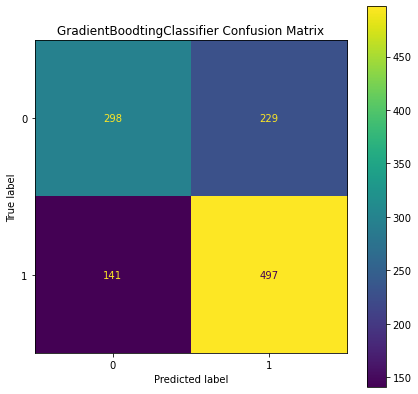

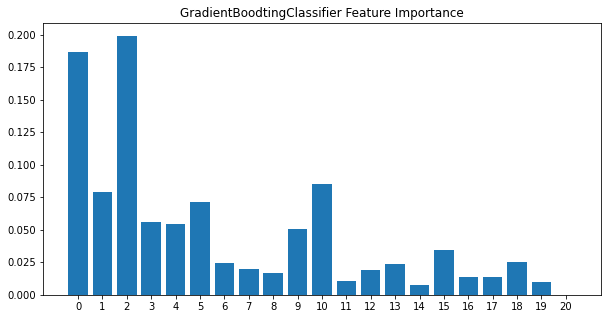

In [31]:
gb_report(X_train3, y_train3, X_val3, y_val3)

In [32]:
for idx, col in enumerate(X_train3.columns):
    print(idx, col)

0 Age
1 Num_children_born
2 Num_living_children
3 age_at_first_marriage
4 age_at_first_intercourse
5 freq_of_intercourse
6 Religion_dup
7 children_in_residence
8 Knowledge_of_ovulatory_cycle_dup
9 Knows_method_source_dup
10 desire_for_more_kids_dup
11 Woman_worked_after_marriage_dup
12 Woman_currently_working_dup
13 heard_FP_message_in_last_month_dup
14 Has_transportation
15 media_exposure_level
16 Education_level_dup
17 Literacy_dup
18 Husbands_edu_level_dup
19 Husbands_literacy_dup
20 Knowledge_of_methods_dup


## Final model choice is GBC without the feature if they've used contraception or not, and without whether or not they are abstaining

In [33]:
#train on both train+val
X_train_val3 = pd.concat([X_train3, X_val3])
y_train_val3 = pd.concat([y_train3, y_val3])

In [34]:
X_train_val3.shape, y_train_val3.shape

((5824, 21), (5824,))

### GCB3

In [35]:
#fit model
final_GBC = GradientBoostingClassifier(n_estimators=1000)
final_GBC.fit(X_train_val3, y_train_val3)

GradientBoostingClassifier(n_estimators=1000)

GradientBoodtingClassifier Confusion Matrix


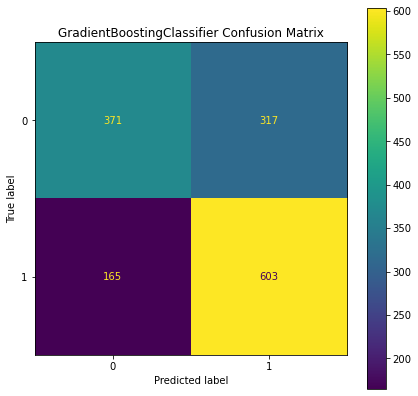

In [36]:
#print confusion matrix
print('GradientBoodtingClassifier Confusion Matrix')
fig, ax = plt.subplots(figsize=(7, 7))
plt.title('GradientBoostingClassifier Confusion Matrix')
plot_confusion_matrix(final_GBC, X_test3, y_test3, ax=ax)
plt.savefig('GBC_confusion_matrix.png');

## Check out the feature importance

In [37]:
#print feature importance
importance_GB = final_GBC.feature_importances_

Feature: 0, Score: 0.18172
Feature: 1, Score: 0.08380
Feature: 2, Score: 0.21722
Feature: 3, Score: 0.04909
Feature: 4, Score: 0.05380
Feature: 5, Score: 0.07065
Feature: 6, Score: 0.02342
Feature: 7, Score: 0.01111
Feature: 8, Score: 0.01039
Feature: 9, Score: 0.05312
Feature: 10, Score: 0.08815
Feature: 11, Score: 0.00668
Feature: 12, Score: 0.01287
Feature: 13, Score: 0.02344
Feature: 14, Score: 0.01108
Feature: 15, Score: 0.03902
Feature: 16, Score: 0.01330
Feature: 17, Score: 0.01734
Feature: 18, Score: 0.02616
Feature: 19, Score: 0.00764
Feature: 20, Score: 0.00002


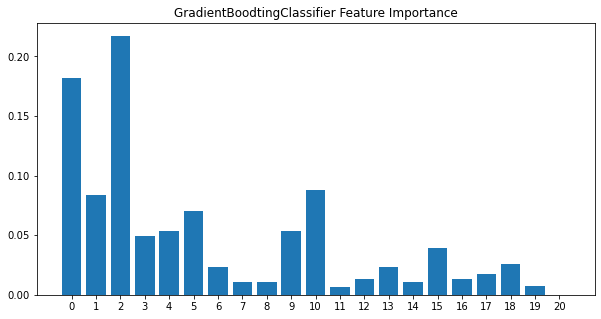

In [38]:
for i,v in enumerate(importance_GB):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize = (10,5))
plt.title('GradientBoodtingClassifier Feature Importance')
plt.bar([x for x in range(len(importance_GB))], importance_GB)
plt.xticks([i for i in range(X_test3.shape[1])])
plt.show()

## Want to view the feature importance sorted

In [39]:
impt_list = list(importance_GB)

In [40]:
feats = [col for col in X_test3.columns]

In [41]:
#make a dataframe
feat_score = pd.DataFrame()
feat_score['Features'] = feats
feat_score['Scores'] = impt_list

feat_score.head()

,Features,Scores
0,Age,0.181717
1,Num_children_born,0.083799
2,Num_living_children,0.217218
3,age_at_first_marriage,0.049089
4,age_at_first_intercourse,0.053796


In [42]:
sorted_feats = feat_score.sort_values(by = ['Scores'], ascending = True)


In [43]:
#i accidentally named all of these in descending order instead of 
# ascending...
# i'm just gonna upload the reversed list instead bcs i'm lazy..
feats_renamed = ['Num of Living Children', 'Age', 
                 'Desire for More Children', 'Num of Children Born', 
                 'Frequency of Intercourse', 'Age at First Intercourse', 
                 'Knows Method Source', 'Age at First Marriage', 
                 'Media Exposure Level', "Husband's Education Level", 
                 'Recently Heard Family Planning Message', 'Religion', 
                 'Literacy', 'Education Level', 'Currently Working', 
                 'Children Living in Residence', 'Has Transportation', 
                 'Knowledge of Ovulatory Cycle', "Husband's Literacy", 
                 'Worked after Marriage', 'Knowledge of Methods']

sorted_feats['Features'] = list(reversed(feats_renamed))

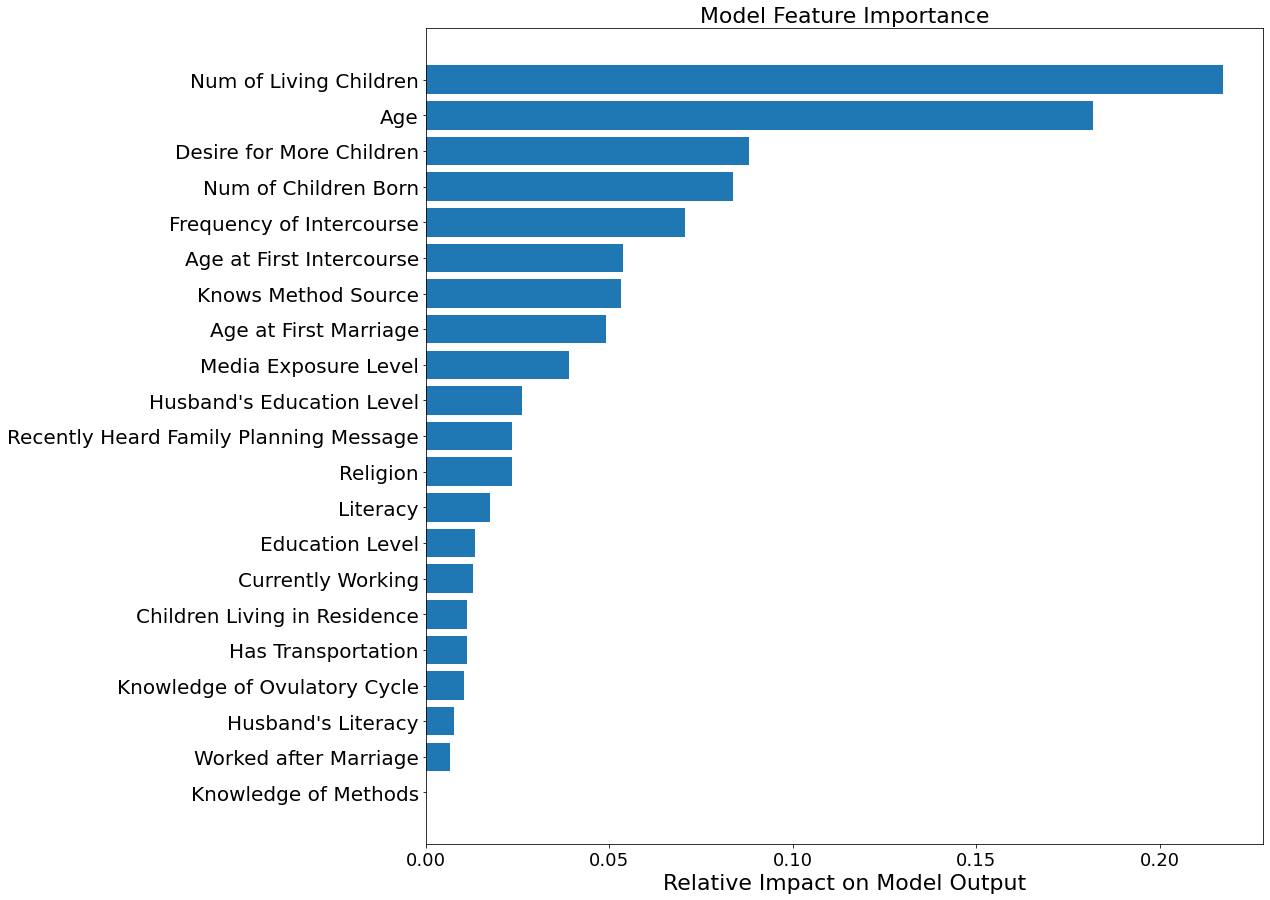

In [44]:
# plot feature importance
fig, ax = plt.subplots(figsize = (15,15))
#plt.figure()
plt.title('Model Feature Importance', fontsize = 22)
plt.barh(sorted_feats['Features'], sorted_feats['Scores'])
plt.xlabel('Relative Impact on Model Output', fontsize = 22)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.savefig('feature_importance.png', bbox_inches = 'tight');

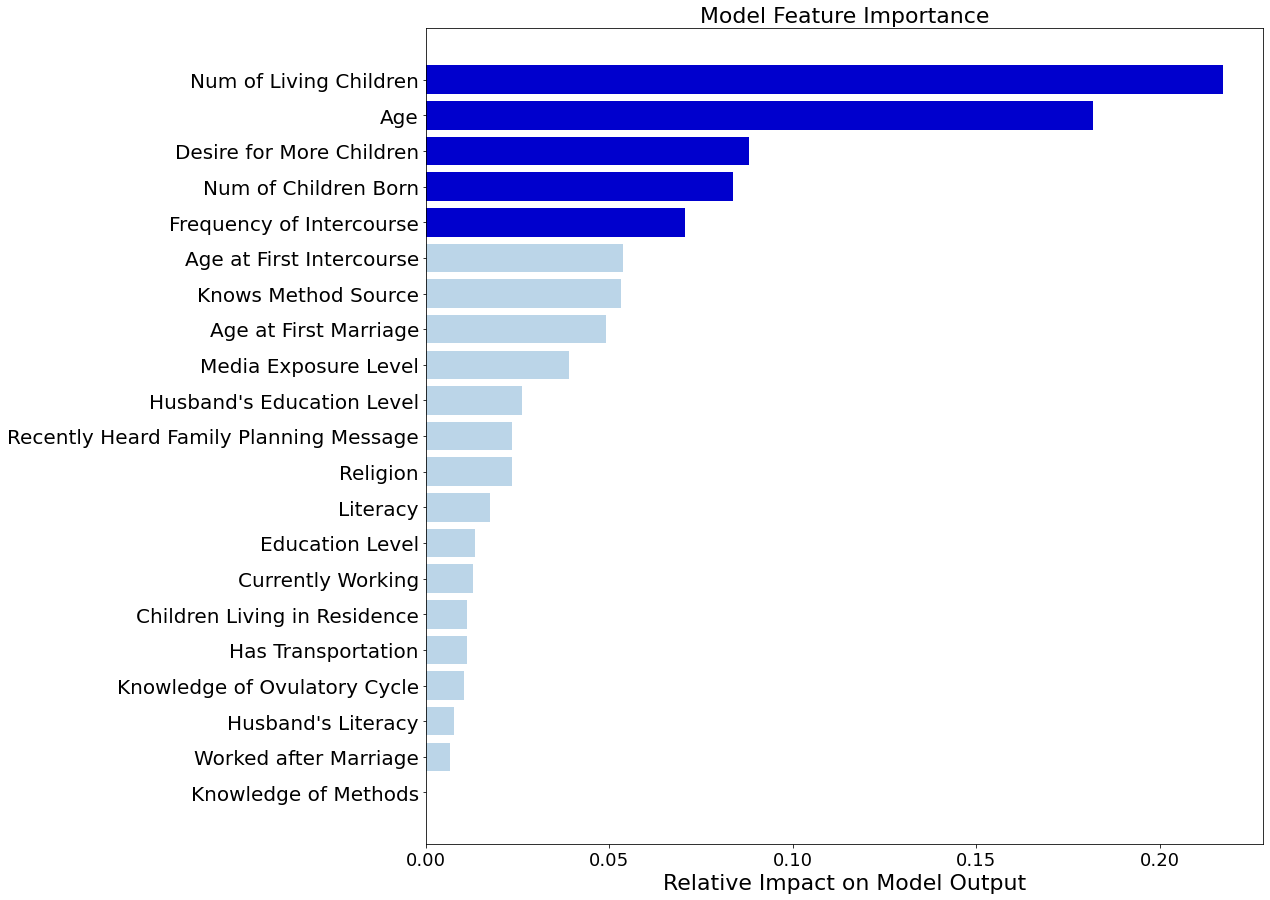

In [45]:
# plot feature importance
fig, ax = plt.subplots(figsize = (15,15))
plt.title('Model Feature Importance', fontsize = 22)
plt.barh(sorted_feats['Features'][:-5], sorted_feats['Scores'][:-5], alpha = 0.30)
plt.barh(sorted_feats['Features'][-5:], sorted_feats['Scores'][-5:], color = 'mediumblue')
plt.xlabel('Relative Impact on Model Output', fontsize = 22)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
#plt.show()
plt.savefig('highlighted_feat_importance.png', bbox_inches = 'tight');


In [51]:
cols_no_dup = []
for col in non_abs.columns:
    cols_no_dup.append(col.replace('_dup', ''))
    
cols_no_dup

['Age',
 'Num_children_born',
 'Num_living_children',
 'age_at_first_marriage',
 'age_at_first_intercourse',
 'freq_of_intercourse',
 'Religion',
 'children_in_residence',
 'Knowledge_of_ovulatory_cycle',
 'Knows_method_source',
 'desire_for_more_kids',
 'Woman_worked_after_marriage',
 'Woman_currently_working',
 'heard_FP_message_in_last_month',
 'Has_transportation',
 'media_exposure_level',
 'Education_level',
 'Literacy',
 'Husbands_edu_level',
 'Husbands_literacy',
 'Knowledge_of_methods',
 'Current_Method']

In [52]:
non_abs.columns = cols_no_dup
non_abs.head(3)

,Age,Num_children_born,Num_living_children,age_at_first_marriage,age_at_first_intercourse,freq_of_intercourse,Religion,children_in_residence,Knowledge_of_ovulatory_cycle,Knows_method_source,desire_for_more_kids,Woman_worked_after_marriage,Woman_currently_working,heard_FP_message_in_last_month,Has_transportation,media_exposure_level,Education_level,Literacy,Husbands_edu_level,Husbands_literacy,Knowledge_of_methods,Current_Method
0,41.0,6.0,5.0,15.0,15.0,4.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,0.0
1,27.0,5.0,5.0,18.0,18.0,4.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,2.0,2.0,2.0,2.0,1.0,0.0
2,41.0,9.0,9.0,18.0,18.0,3.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,0.0


# Pickle the model, and save the features importance df as a csv to generate that graph in tableau

In [53]:
#pickle the test set to use in the streamlit app
X_test3.to_pickle('X_test3.pkl')
y_test3.to_pickle('y_test3.pkl')

In [54]:
non_abs.to_csv('Final_model_df_renamed_cols.csv', index = False)

In [55]:
sorted_feats.to_csv('sorted_impt_feats_final_model.csv')

In [56]:
import pickle

with open("final_gcb.pkl", "wb") as f:
    pickle.dump(final_GBC, f)

In [ ]:
#to load to pickle, use 

# with open("predictor/lr.pkl", "rb") as f:
#     lr_model2 = pickle.load(f)

In [59]:
#make a prediction

person = np.array([40, 6, 4, 24, 21, 4, 1, 0, 1, 1, 0, 1, 1, 0, 1, 3, 3, 2, 3, 2, 2])
final_GBC.predict(person.reshape(1,-1))
final_GBC.predict_proba(person.reshape(1,-1))[0, 0]

0.35558210824844516

## Check out feature importance using SHAP

In [60]:
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(final_GBC)
shap_values = explainer.shap_values(X_test3)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test3.iloc[0,:])


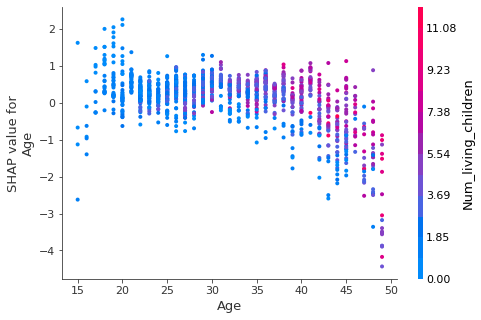

In [61]:
# create a dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("Age", shap_values, X_test3)

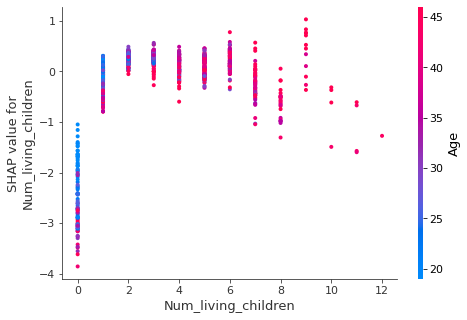

In [62]:
# create a dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("Num_living_children", shap_values, X_test3)

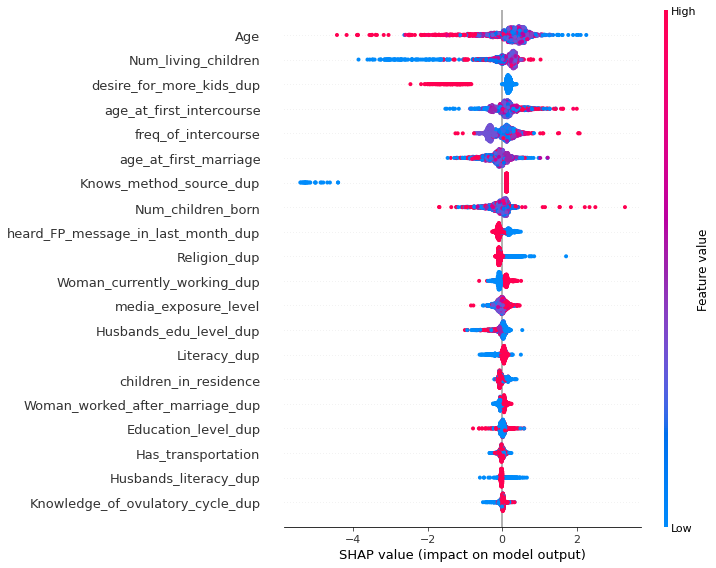

In [63]:
# summarize the effects of all the features
fig = shap.summary_plot(shap_values, X_test3, show = False)
plt.savefig('shap_feature_impt.png', bbox_inches = 'tight')


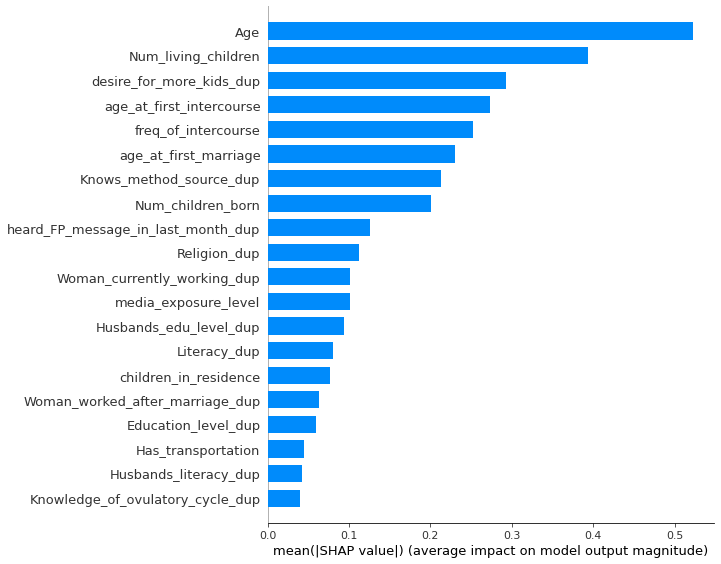

In [64]:
shap.summary_plot(shap_values, X_test3, plot_type="bar")
#the features here don't have the same importance level as above
#at least not in the same order
#that's bcs they were calculated using different metrics, but they have 
# generally the same importance level as above